In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_dir = r"D:\MAJOR PROJECT\CTScanModel\lungCancer\preProcessedLungCancer\train"

In [18]:
val_dir = r"D:\MAJOR PROJECT\CTScanModel\lungCancer\preProcessedLungCancer\validaton"

In [19]:
test_dir = r"D:\MAJOR PROJECT\CTScanModel\lungCancer\preProcessedLungCancer\test"

In [20]:
# Create an ImageDataGenerator for data augmentation (optional but recommended)
train_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=32,           # Adjust batch size for memory constraints
    class_mode='categorical'  # Use 'categorical' for multiple classes, 'binary' for 2 classes
)

Found 1666 images belonging to 3 classes.


In [24]:
valid_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=32,           # Adjust batch size for memory constraints
    class_mode='categorical'  # Use 'categorical' for multiple classes, 'binary' for 2 classes
)

Found 210 images belonging to 3 classes.


In [25]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=32,           # Adjust batch size for memory constraints
    class_mode='categorical',  # Use 'categorical' for multiple classes, 'binary' for 2 classes
    classes=['Bengin_lung_cancer_image', 'malignant_lung_cancer_image', 'normal_images']  # Specify valid classes explicitly
)

Found 207 images belonging to 3 classes.


In [26]:
len(train_generator)

53

hence we 53 batch each batch consist of 32 image expect last ones

name of the classes we have in train_generator

In [364]:
train_generator.class_indices

{'Bengin_lung_Cancer_image': 0, 'malignant_lung_cancer': 1, 'normal_images': 2}

In [365]:
train_generator.classes

array([0, 0, 0, ..., 2, 2, 2])

In [366]:
train_generator.image_shape

(224, 224, 3)

so we have three classes of image and size of the image 224 224 3

In [367]:
train_generator[0][1]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [368]:
len(train_generator[0][1])

32

In [369]:
image_label = ['bengin_cancer', 'malignant_cancer', 'normal_image']

In [370]:
images,label = next(train_generator)

In [371]:
print(f"length of the images = {len(images)} and length of the label = {len(label)}")

length of the images = 32 and length of the label = 32


In [372]:
images[0]

array([[[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       ...,

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0

In [373]:
label[0]

array([0., 1., 0.], dtype=float32)

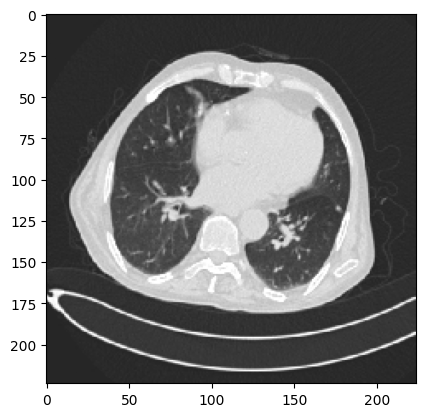

In [374]:
plt.imshow(images[0])

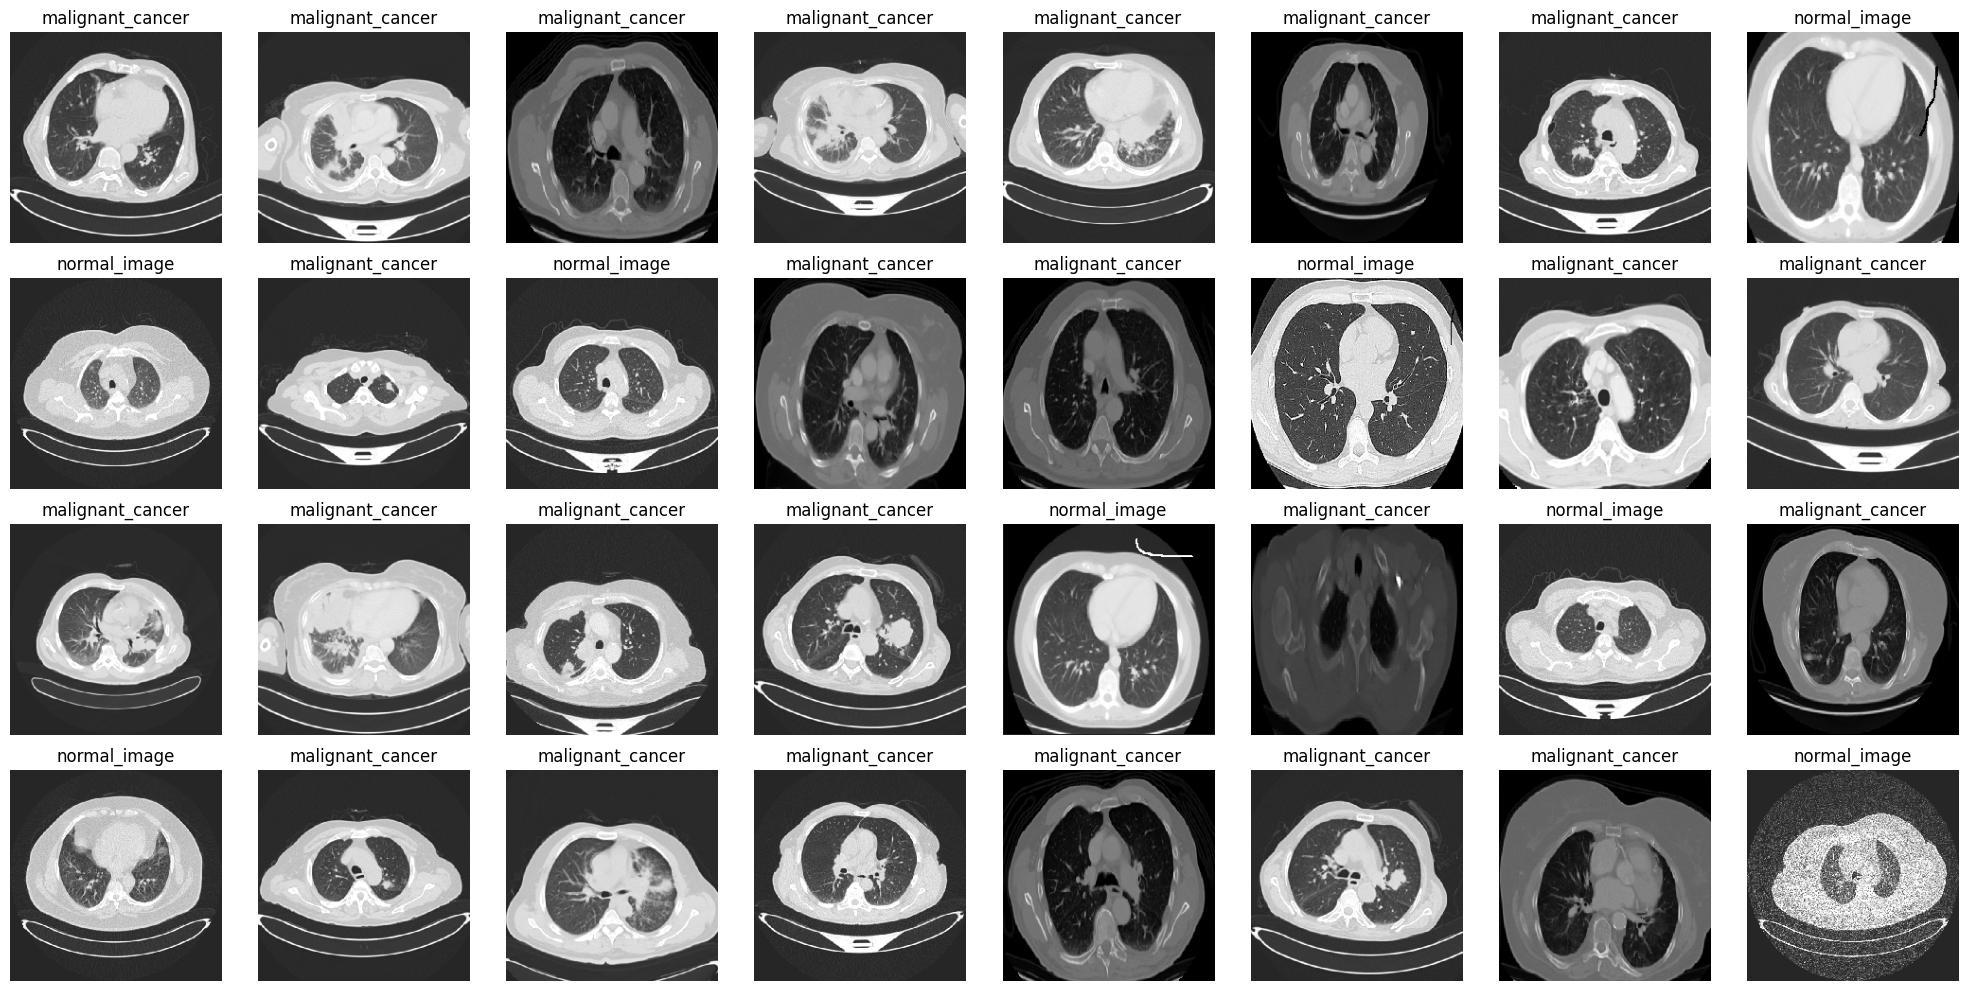

In [375]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
  plt.subplot(4,8,i+1)
  plt.imshow(images[i])
  index = np.argmax(label[i])
  plt.title(image_label[index])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [376]:
train_generator.reset()

In [377]:
training_images = []
training_labels = []
for i in range(len(train_generator)):
    batch_data, batch_labels = next(train_generator)
    training_images.append(batch_data)
    training_labels.append(batch_labels)

training_images = np.concatenate(training_images)
training_labels = np.concatenate(training_labels)

In [378]:
testing_images = []
testing_labels = []
for i in range(len(test_generator)):
    batch_data, batch_labels = next(test_generator)
    testing_images.append(batch_data)
    testing_labels.append(batch_labels)
testing_images = np.concatenate(testing_images)
testing_labels = np.concatenate(testing_labels)

In [379]:
validation_images = []
validation_labels  = []
for i in range(len(valid_generator)):
    batch_data, batch_labels = next(valid_generator)
    validation_images.append(batch_data)
    validation_labels.append(batch_labels)
validation_images = np.concatenate(validation_images)
validation_labels = np.concatenate(validation_labels)

In [380]:
print(len(training_images))
print(len(testing_images))

1666
207


In [381]:
print(len(training_labels))
print(len(testing_labels))

1666
207


In [382]:
print(len(validation_images))
print(len(validation_labels))

210
210


In [383]:
training_images[0]

array([[[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       ...,

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0

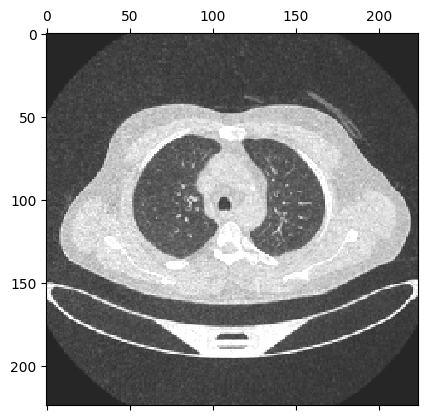

In [384]:
plt.matshow(training_images[0])

In [385]:
training_labels[0]

array([0., 0., 1.], dtype=float32)

In [386]:
training_labels_output = np.argmax(training_labels,axis = 1)
testing_labels_output = np.argmax(testing_labels,axis = 1)
validation_labels_output = np.argmax(validation_labels,axis = 1)

In [387]:
print(len(training_labels_output))
print(len(testing_labels_output))
print(len(validation_labels_output))

1666
207
210


In [388]:
training_labels_output[0]

2

In [389]:
testing_labels_output[0]

2

In [390]:
validation_labels_output[0]

1

In [391]:
image_label[training_labels_output[0]]

'normal_image'

we have all image in training_image and we have label output in training_label_output
total size of training data is 1666
training support vector machine on this dataset

In [392]:
training_images.ndim

4

In [393]:
training_images.shape

(1666, 224, 224, 3)

here 1666 denote the total number of image 224 denote the height of the image 224 denote the width of the image 3 refer to the channel of the image here the channel is RGB RED GREEN BLUE

In [394]:
import keras

In [395]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [396]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

VGG 16 is convolutional neural network with 16 layer it is pretrained on large dataset of over a million of images from imagenet and classify image into 1000 category

In [397]:
image_size = [224,224]

In [398]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

In [399]:
vgg19 = VGG19(input_shape = image_size + [3], weights = 'imagenet',include_top = False)

In [400]:
vgg.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_180>

In [401]:
vgg19.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_199>

In [402]:
len(vgg.layers)

19

In [403]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [404]:
for layer in vgg19.layers:
  layer.trainable = False

In [12]:
from glob import glob

In [13]:
folder = glob(r"D:\MAJOR PROJECT\CTScanModel\lungCancer\preProcessedLungCancer\train")

In [14]:
len(folder)

1

In [408]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

In [409]:
vgg19X = Flatten()(vgg19.output)
# x = Dense(1000, activation='relu')(x)
predictionvgg19 = Dense(3, activation='softmax')(vgg19X)

In [410]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [411]:
modelvgg19 = Model(inputs=vgg19.input, outputs=predictionvgg19)

In [412]:
# view the structure of the model
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [413]:
modelvgg19.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099,651 (76.67 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [414]:
type(training_images)

numpy.ndarray

In [415]:
type(training_labels)

numpy.ndarray

In [416]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [417]:
modelvgg19.compile(
    loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [418]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs of no improvement
    restore_best_weights=True  # Roll back to the best weights
)

vgg16model = model.fit(
    training_images,         # Training images
    training_labels,         # Training labels
    epochs=11,                # Number of epochs
    validation_data=(
        validation_images,   # Validation images
        validation_labels    # Validation labels
    )
)

Epoch 1/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 466s 7s/step - accuracy: 0.7039 - loss: 1.0996 - val_accuracy: 0.9286 - val_loss: 0.2327
Epoch 2/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 353s 7s/step - accuracy: 0.9550 - loss: 0.1361 - val_accuracy: 0.8857 - val_loss: 0.2738
Epoch 3/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 350s 7s/step - accuracy: 0.9259 - loss: 0.2254 - val_accuracy: 0.9571 - val_loss: 0.1260
Epoch 4/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 366s 7s/step - accuracy: 0.9834 - loss: 0.0566 - val_accuracy: 0.9762 - val_loss: 0.1111
Epoch 5/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 373s 7s/step - accuracy: 0.9929 - loss: 0.0331 - val_accuracy: 0.9619 - val_loss: 0.1298
Epoch 6/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 366s 7s/step - accuracy: 0.9983 - loss: 0.0245 - val_accuracy: 0.9619 - val_loss: 0.1412
Epoch 7/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 288s 5s/step - accuracy: 0.9939 - loss: 0.0334 - val_accuracy: 0.9619 - val_loss: 0.1115
Epoch 8/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.9984 - loss: 0.0169 - val_accuracy: 0.9762 - v

In [419]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs of no improvement
    restore_best_weights=True  # Roll back to the best weights
)
vgg19model = modelvgg19.fit(
    training_images,         # Training images
    training_labels,         # Training labels
    epochs=11,                # Number of epochs
    validation_data=(
        validation_images,   # Validation images
        validation_labels    # Validation labels
    )
)

Epoch 1/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 467s 4s/step - accuracy: 0.6996 - loss: 1.1548 - val_accuracy: 0.9048 - val_loss: 0.2394
Epoch 2/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.9480 - loss: 0.1459 - val_accuracy: 0.9190 - val_loss: 0.1996
Epoch 3/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 335s 6s/step - accuracy: 0.9687 - loss: 0.1133 - val_accuracy: 0.9667 - val_loss: 0.1345
Epoch 4/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 437s 8s/step - accuracy: 0.9878 - loss: 0.0604 - val_accuracy: 0.9714 - val_loss: 0.1331
Epoch 5/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 430s 8s/step - accuracy: 0.9922 - loss: 0.0398 - val_accuracy: 0.9476 - val_loss: 0.1327
Epoch 6/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 431s 8s/step - accuracy: 0.9930 - loss: 0.0405 - val_accuracy: 0.9524 - val_loss: 0.1382
Epoch 7/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 427s 8s/step - accuracy: 0.9922 - loss: 0.0370 - val_accuracy: 0.9762 - val_loss: 0.1212
Epoch 8/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 433s 8s/step - accuracy: 0.9966 - loss: 0.0274 - val_accuracy: 0.9619 - v

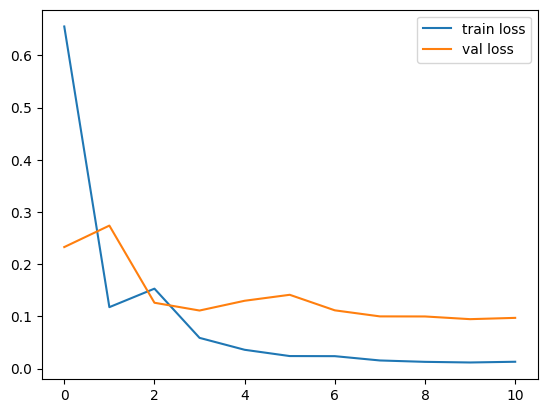

<Figure size 640x480 with 0 Axes>

In [420]:
# loss
plt.plot(vgg16model.history['loss'], label='train loss')
plt.plot(vgg16model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

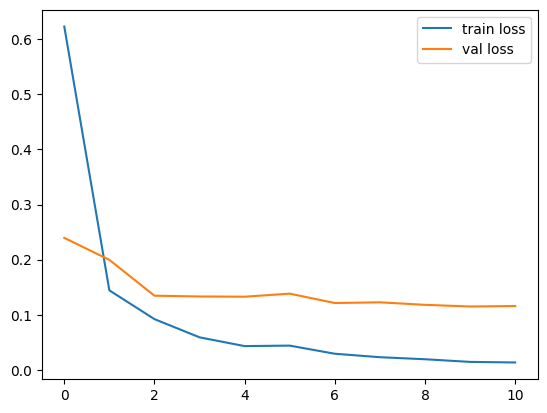

<Figure size 640x480 with 0 Axes>

In [421]:
# loss
plt.plot(vgg19model.history['loss'], label='train loss')
plt.plot(vgg19model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

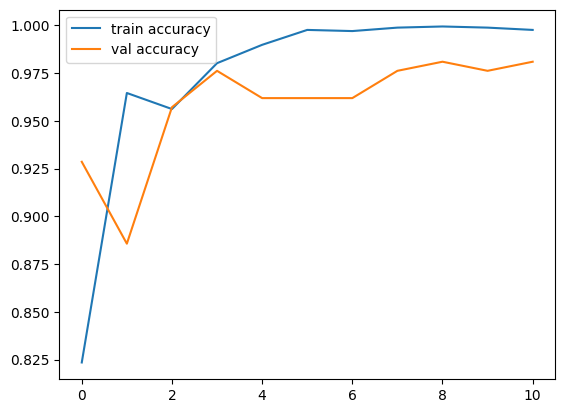

<Figure size 640x480 with 0 Axes>

In [422]:
# loss
plt.plot(vgg16model.history['accuracy'], label='train accuracy')
plt.plot(vgg16model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

lets check on some test data how our model perform

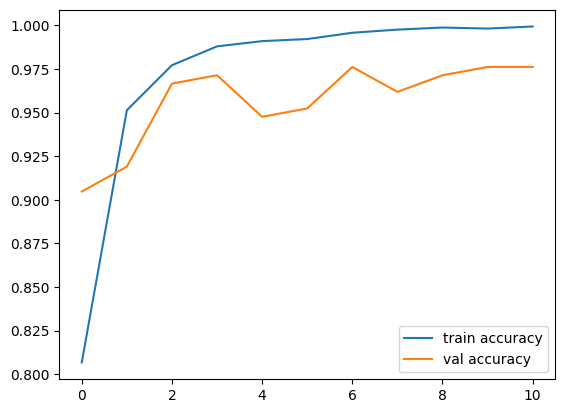

<Figure size 640x480 with 0 Axes>

In [423]:
# loss
plt.plot(vgg19model.history['accuracy'], label='train accuracy')
plt.plot(vgg19model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [424]:
testing_images[0]

array([[[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       ...,

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0

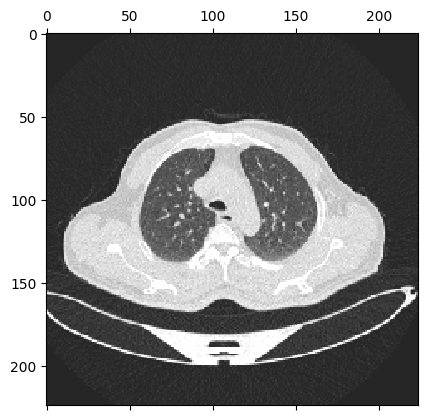

In [425]:
plt.matshow(testing_images[0])

In [426]:
image_label[testing_labels_output[0]]

'normal_image'

In [427]:
testing_images.ndim

4

In [428]:
testing_images[0].ndim

3

In [429]:
output = model.predict(testing_images)

7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step


In [430]:
# output from vgg 19 training model
outputvgg19 = modelvgg19.predict(testing_images)

7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step


In [431]:
output

array([[9.76655073e-03, 8.87169410e-03, 9.81361687e-01],
       [2.93957815e-03, 2.09497847e-03, 9.94965374e-01],
       [8.43042108e-06, 9.99979496e-01, 1.20335080e-05],
       [9.98449087e-01, 1.67464241e-04, 1.38342381e-03],
       [8.87792349e-01, 2.29824847e-03, 1.09909393e-01],
       [2.01489726e-07, 9.99979734e-01, 2.00390186e-05],
       [5.01465220e-05, 9.85822141e-01, 1.41277015e-02],
       [2.64023214e-07, 9.99993801e-01, 5.94195399e-06],
       [2.16513174e-04, 3.75021249e-03, 9.96033370e-01],
       [1.92381576e-05, 9.99932289e-01, 4.84754528e-05],
       [1.43224668e-07, 9.99835730e-01, 1.64111567e-04],
       [2.23409380e-08, 9.99987483e-01, 1.25078013e-05],
       [7.75097287e-05, 1.24008628e-04, 9.99798596e-01],
       [2.35883752e-03, 9.91751492e-01, 5.88963320e-03],
       [2.08631764e-06, 9.99926209e-01, 7.17443254e-05],
       [1.22850806e-01, 8.47240686e-01, 2.99084559e-02],
       [5.55322117e-07, 9.99979496e-01, 1.99919232e-05],
       [7.40131922e-03, 9.86263

In [432]:
outputvgg19

array([[3.07367602e-03, 9.29555111e-03, 9.87630785e-01],
       [5.84745663e-04, 1.18353553e-02, 9.87579882e-01],
       [1.14104751e-05, 9.99903440e-01, 8.51124278e-05],
       [9.86463547e-01, 8.85194167e-05, 1.34479320e-02],
       [8.57061803e-01, 3.06706876e-03, 1.39871135e-01],
       [4.38905488e-07, 9.99935269e-01, 6.42919840e-05],
       [9.82215766e-08, 9.95592177e-01, 4.40772437e-03],
       [2.88845303e-08, 9.99997020e-01, 2.96695885e-06],
       [1.70901461e-04, 1.44836726e-03, 9.98380780e-01],
       [7.43425289e-07, 9.99970436e-01, 2.88301126e-05],
       [1.28085532e-07, 9.99034166e-01, 9.65779764e-04],
       [3.93810451e-09, 9.99997497e-01, 2.50928633e-06],
       [5.13281448e-05, 1.59967021e-04, 9.99788702e-01],
       [2.33161947e-04, 9.85949814e-01, 1.38169844e-02],
       [5.85316648e-08, 9.99952316e-01, 4.75796696e-05],
       [1.54166697e-02, 5.75809538e-01, 4.08773780e-01],
       [1.49040261e-06, 9.99698281e-01, 3.00271029e-04],
       [7.02453544e-05, 9.91421

In [433]:
from sklearn.metrics import accuracy_score

In [434]:
print("acuracy score of vgg16 " ,accuracy_score(testing_labels_output,np.argmax(output,axis = 1)))

acuracy score of vgg16  0.9903381642512077


In [435]:
print("acuracy score of vgg19 " ,accuracy_score(testing_labels_output,np.argmax(outputvgg19,axis = 1)))

acuracy score of vgg19  0.9951690821256038



the accuracy we get is 99 percent on testing data

In [436]:
img_array_expanded = np.expand_dims(testing_images[0], axis=0)
ans = model.predict(img_array_expanded)
image_label[np.argmax(ans)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


'normal_image'

In [437]:
image_label[testing_labels_output[0]]

'normal_image'

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

In [438]:
print(train_generator.class_indices)  # Check the mapping of classes
print(test_generator.class_indices)


{'Bengin_lung_Cancer_image': 0, 'malignant_lung_cancer': 1, 'normal_images': 2}
{'Bengin_lung_cancer_image': 0, 'malignant_lung_cancer_image': 1, 'normal_images': 2}


In [439]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [440]:
output = np.argmax(output,axis = 1)

In [441]:
outputvgg19 = np.argmax(outputvgg19,axis = 1)

In [442]:
print(testing_labels_output[:5])
print()
print(output[:5])

[2 2 1 0 0]

[2 2 1 0 0]


In [443]:
cm = confusion_matrix(testing_labels_output,output)

In [444]:
cmvgg19 = confusion_matrix(testing_labels_output,outputvgg19)

In [445]:
cm

array([[ 12,   0,   0],
       [  0, 134,   0],
       [  2,   0,  59]], dtype=int64)

In [446]:
cmvgg19

array([[ 12,   0,   0],
       [  0, 133,   1],
       [  0,   0,  61]], dtype=int64)

In [447]:
cm_df = pd.DataFrame(cm,
                     index = ['Bengin_lung_Cancer_image', 'malignant_lung_cancer', 'normal_images'],
                     columns = ['Bengin_lung_Cancer_image', 'malignant_lung_cancer', 'normal_images'])

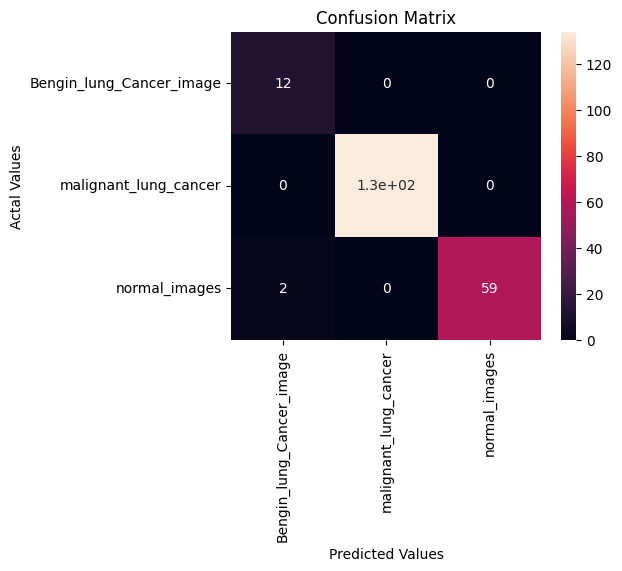

In [448]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

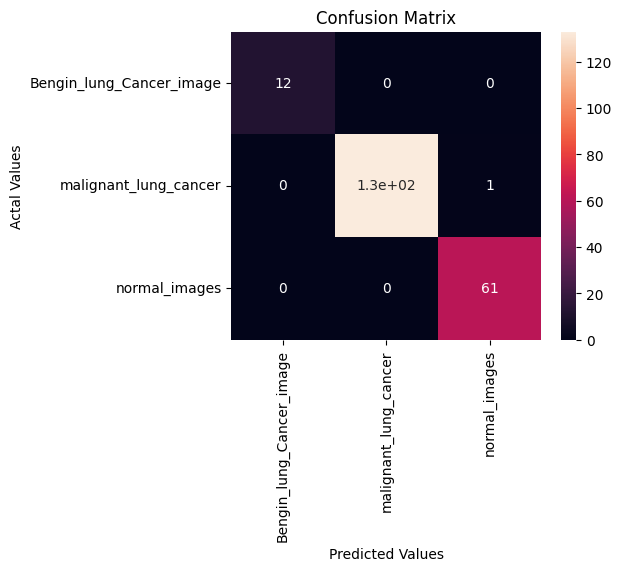

In [449]:
cm_df = pd.DataFrame(cmvgg19,
                     index = ['Bengin_lung_Cancer_image', 'malignant_lung_cancer', 'normal_images'],
                     columns = ['Bengin_lung_Cancer_image', 'malignant_lung_cancer', 'normal_images'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [450]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [451]:
f1_scorevgg16 = f1_score(testing_labels_output, output, average="macro")
precision_scorevgg16 = precision_score(testing_labels_output, output, average="macro")
recall_scorevgg16 = recall_score(testing_labels_output, output, average="macro")

In [452]:
f1_scorevgg19 = f1_score(testing_labels_output, outputvgg19, average="macro")
precision_scorevgg19 = precision_score(testing_labels_output, outputvgg19, average="macro")
recall_scorevgg19 = recall_score(testing_labels_output, outputvgg19, average="macro")

In [453]:
from sklearn.metrics import cohen_kappa_score

In [454]:
kappavgg16 = cohen_kappa_score(testing_labels_output,output)

In [455]:
kappavgg19 = cohen_kappa_score(testing_labels_output,outputvgg19)

In [456]:
print("VGG 16 RESULT")
print(f"f1 score is { f1_scorevgg16*100 }")
print(f"precision score is { precision_scorevgg16*100 }")
print(f"recall score is { recall_scorevgg16*100 }")
print(f"kappa score is { kappavgg16*100}")

VGG 16 RESULT
f1 score is 96.88034188034187
precision score is 95.23809523809524
recall score is 98.90710382513662
kappa score is 98.04032945186026


In [457]:
print("VGG 19 RESULT")
print(f"f1 score is { f1_scorevgg19*100 }")
print(f"precision score is { precision_scorevgg19*100 }")
print(f"recall score is { recall_scorevgg19*100}")
print(f"kappa score is {kappavgg19*100}")

VGG 19 RESULT
f1 score is 99.60415334490423
precision score is 99.46236559139786
recall score is 99.75124378109453
kappa score is 99.01900383868063


In [458]:
# Save the VGG16 model
model.save("vgg16_lung_cancer_model.h5")  # Saves as an HDF5 file

# Save the VGG19 model
modelvgg19.save("vgg19_lung_cancer_model.h5")  # Saves as an HDF5 file

print("Models saved successfully!")


Models saved successfully!


In [459]:
# Save the VGG16 model in the recommended format
model.save("vgg16_lung_cancer_model.keras")  # Saves in the Keras format

# Save the VGG19 model in the recommended format
modelvgg19.save("vgg19_lung_cancer_model.keras")  # Saves in the Keras format

print("Models saved in the recommended format!")


Models saved in the recommended format!


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved VGG16 model
loaded_vgg16_model = load_model("vgg16_lung_cancer_model.h5")

# Load the saved VGG19 model
loaded_vgg19_model = load_model("vgg19_lung_cancer_model.h5")

# Print a summary to ensure the models are intact
loaded_vgg16_model.summary()
loaded_vgg19_model.summary()


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved VGG16 model
loaded_vgg16_model = load_model("vgg16_lung_cancer_model.keras")

# Load the saved VGG19 model
loaded_vgg19_model = load_model("vgg19_lung_cancer_model.keras")

# Print a summary to ensure the models are intact
loaded_vgg16_model.summary()
loaded_vgg19_model.summary()
